In [1]:
# Devoir 1
# Mesures de similarité - Test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MNIST: TEST POUR 20 PREMIÈRES IMAGES de mnist_train
mnist_train = pd.read_csv('mnist_train.csv')

x_train = mnist_train.drop('label', axis = 1).values
y_train = mnist_train.loc[:, 'label'].values

x_train = x_train[0:20,:]
y_train = y_train[0:20]
print(y_train)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


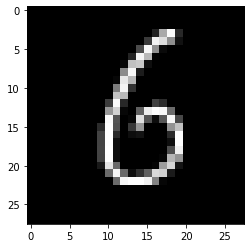

In [3]:
# Tirée du TP1
image = x_train[18]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()

for i in range(len(x_train)):
    for j in range(len(x_train[0])):
        if x_train[i][j] != 0:
            x_train[i][j] = round(int(x_train[i][j])/255.0)

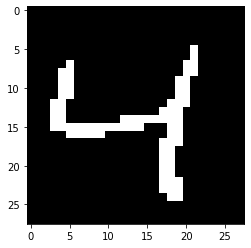

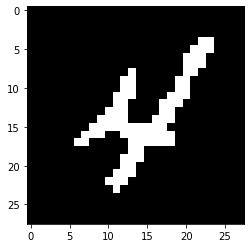

In [4]:
# On transforme l'image afin que les pixels soient uniquement des valeurs 0 ou 1.
image = x_train[2]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()
image = x_train[9]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()

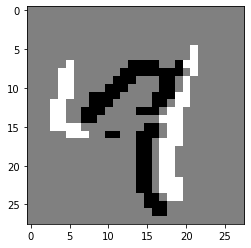

Nombre de pixels blancs: 61
Nombre de pixels noirs: 71
Nombre de pixels gris: 652


In [7]:
# Début de la mesure de dissimilarité entre deux images:

# ÉTAPE 1: Créer une image qui est la différence entre les deux images
# -1 sont représentés par des pixels noirs, 1: blanc et 0: gris

image = x_train[2] - x_train[4]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()

ones = np.count_nonzero(image == 1)
ones_neg = np.count_nonzero(image == -1)
zeros = np.count_nonzero(image == 0)

print(f'Nombre de pixels blancs: {ones}')
print(f'Nombre de pixels noirs: {ones_neg}')
print(f'Nombre de pixels gris: {zeros}')

In [345]:
# white_matrix: matrice des pixels blancs selon leur position (28x28). Au lieu d'avoir des valeurs qui sont uniquement des "1", 
# ce dernier est remplacé par sa position en colonne.

# Par exemple: supposons qu'il existe un pixel blanc à la 7e ligne et à la 18e colonne.
# white_matrix va contenir donc la valeur "18" à la position (7,18).

# Même principe pour dark_matrix, mais pour les pixels noirs.

white_matrix = np.zeros((28,28))
dark_matrix = np.zeros((28,28))

for i in range(matrix_image.shape[0]):
    for j in range(matrix_image.shape[0]):
        if matrix_image[i][j] == 1:
            white_matrix[i][j] = j
        elif matrix_image[i][j] == -1:
            dark_matrix[i][j] = j

In [346]:
# On va comparer à quel point les pixels blancs sont loins aux pixels noirs pour CHAQUE ligne.
# La complexité augmentera en raison du nombre de combinaisons de distances à calculer.

# Tentative: pour CHAQUE ligne, on prend un seul pixel noir et blanc qui représentent la majorité des pixels noirs et blancs.
# Ici, on choisit de prendre la médiane.

white_array = np.zeros(28)
dark_array = np.zeros(28)

white_median = 0
dark_median = 0

for i in range(matrix_image.shape[0]):
    white_median = np.median(white_matrix[i,:][white_matrix[i,:] != 0])
    white_array[i] = white_median
    
    dark_median = np.median(dark_matrix[i,:][dark_matrix[i,:] != 0])
    dark_array[i] = dark_median

white_array[np.isnan(white_array)] = 0
white_array = np.round(white_array).astype(int)
dark_array[np.isnan(dark_array)] = 0
dark_array = np.round(dark_array).astype(int)

# Résumé chaque ligne par la médiane
print(white_array)
print(dark_array)

[ 0  0  0  0  0 21 21 20  5  5  5 12 12 11 17  6  7 18 18 18 18 18 18 18
 18  0  0  0]
[ 0  0  0  0  0  0  0 15 16 13 12 11 10 12  8 16 14 14 14 14 14 14 14 14
 16 16 16  0]


In [347]:
simple_matrix = np.zeros((28,28))

for i in range(white_array.shape[0]):
    if white_array[i] != 0:
        simple_matrix[i][white_array[i]] = 1
    if dark_array[i] != 0:
        simple_matrix[i][dark_array[i]] = -1  

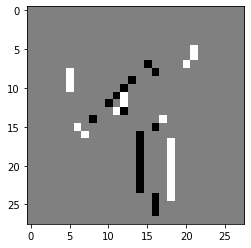

In [348]:
# Simplfication de l'image en conservant uniquement les pixels préservant la forme générale
plt.imshow(simple_matrix, cmap='gray')
plt.show()

In [349]:
# CAS #1: Si on a un pixel noir et blanc sur une ligne. On calcule la distance entre les deux.
#         Autrement dit, si à la 7e ligne, pixel blanc se trouve à la 23e colonne et pixel noir se trouve à la 25e colonne,
#         on aura une dissimilarité de 2 pixels à la 7e ligne.
# CAS #2: Si on a un seul type de pixel sur une ligne (blanc OU noir). On incrémente la dissimilarité de 1 pour dire qu'il
#         existe un pixel supplémentaire.

# Dissimilarité = Sum(i) pour 1 à 28 abs{xi - yi} où xi = 1 si yi = 0, yi = 1 si yi = 0

for i in range(white_array.shape[0]):
    if white_array[i] == 0 and dark_array[i] != 0:
        dark_array[i] = 1
    elif white_array[i] != 0 and dark_array[i] == 0:
        white_array[i] = 1

dissimilarity = np.sum(abs(white_array - dark_array))
print(dissimilarity)

95


In [ ]:
# Notion de similarité:
# Nombre de pixels entre les pixels blancs et noirs et nombre supplémentaire de pixels